# 로이터 통신 데이터셋
* 짧은 뉴스 기사와 토픽의 집합 (1986년 공개)
* 46개의 토픽(비율이 고정이 아님)
* 각 토픽은 최소 10개의 샘플이 들어 있음
* 학습 데이터 : 8,982, 테스트 데이터 : 2,246

In [2]:
import tensorflow.keras
import pandas as pd
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow.keras.utils import to_categorical


reuters.load_data()

((array([list([1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
         list([1, 3267, 699, 3434, 2295, 56, 16784, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 19261, 49, 2295, 13415, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 13415, 30625, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
         list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 

In [3]:
(train_data,train_labels), (test_data,test_labels) = reuters.load_data(num_words=10000)


# 데이터 프레임으로 변경 

train_data_df = pd.DataFrame(train_data)
train_labels_df = pd.DataFrame(train_labels)


news_df = pd.DataFrame(train_data_df)
news_df.columns = ['train_data']
news_df['train_labels'] = train_labels_df
news_df # 1은 긍정 0은 부정

,train_data,train_labels
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ...",3
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,...",4
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,...",3
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46...",4
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2...",4
...,...,...
8977,"[1, 313, 262, 2529, 1426, 8, 130, 40, 129, 363...",19
8978,"[1, 4, 96, 5, 340, 3976, 23, 328, 6, 154, 7, 4...",19
8979,"[1, 141, 3890, 387, 81, 8, 16, 1629, 10, 340, ...",25
8980,"[1, 53, 46, 957, 26, 14, 74, 132, 26, 39, 46, ...",3


In [4]:
train_labels_series = pd.Series(train_labels)
print(train_labels_series.value_counts())

3     3159
4     1949
19     549
16     444
1      432
11     390
20     269
13     172
8      139
10     124
9      101
21     100
25      92
2       74
18      66
24      62
0       55
34      50
12      49
36      49
28      48
6       48
30      45
23      41
31      39
17      39
40      36
32      32
41      30
14      26
39      24
26      24
43      21
15      20
37      19
38      19
29      19
45      18
5       17
7       16
27      15
22      15
42      13
44      12
33      11
35      10
Name: count, dtype: int64


In [5]:
# 인덱스-단어 매핑 가져오기 (단어와 정수 인덱스를 매핑한 딕셔너리)
word_index = reuters.get_word_index()

# 매핑 뒤집기 (숫자를 key 단어를 value)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # items -> 딕셔너리를 쌍으로 묶게 만듬


sorted(reverse_word_index.items())

# 리뷰 디코딩 
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [6]:
sorted(reverse_word_index.items())


[(1, 'the'),
 (2, 'of'),
 (3, 'to'),
 (4, 'in'),
 (5, 'said'),
 (6, 'and'),
 (7, 'a'),
 (8, 'mln'),
 (9, '3'),
 (10, 'for'),
 (11, 'vs'),
 (12, 'dlrs'),
 (13, 'it'),
 (14, 'reuter'),
 (15, '000'),
 (16, '1'),
 (17, 'pct'),
 (18, 'on'),
 (19, 'from'),
 (20, 'is'),
 (21, 'that'),
 (22, 'its'),
 (23, 'cts'),
 (24, 'by'),
 (25, 'at'),
 (26, 'year'),
 (27, 'be'),
 (28, 'with'),
 (29, '2'),
 (30, 'will'),
 (31, 'was'),
 (32, 'billion'),
 (33, 'he'),
 (34, 'u'),
 (35, 's'),
 (36, 'net'),
 (37, 'has'),
 (38, 'would'),
 (39, 'an'),
 (40, 'as'),
 (41, '5'),
 (42, 'not'),
 (43, 'loss'),
 (44, '4'),
 (45, '1986'),
 (46, 'company'),
 (47, 'which'),
 (48, 'but'),
 (49, 'this'),
 (50, 'shr'),
 (51, 'last'),
 (52, 'are'),
 (53, 'lt'),
 (54, 'have'),
 (55, 'or'),
 (56, '6'),
 (57, 'bank'),
 (58, '7'),
 (59, 'were'),
 (60, '8'),
 (61, 'had'),
 (62, 'oil'),
 (63, 'trade'),
 (64, 'share'),
 (65, 'one'),
 (66, 'about'),
 (67, '0'),
 (68, 'inc'),
 (69, '9'),
 (70, 'new'),
 (71, 'profit'),
 (72, 'also'),
 (7

# 데이터 준비

In [7]:
# X data들에 대한 원 핫 인코딩
# Y data들에 대한 원 핫 인코딩

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension)) # 시퀀스의 행, 디멘션의 열에 0 값 채워 넣기
    
    
    for i , sequence in enumerate(sequences):
        results[i,sequence] = 1.
          
    return results
    
# 훈련 데이터를 벡터로 변환
X_train = vectorize_sequences(train_data).astype('float32')
# 테스트 데이터를 벡터로 변환
X_test = vectorize_sequences(test_data).astype('float32')


y_train = to_categorical(train_labels, num_classes=46)
y_test = to_categorical(test_labels, num_classes=46)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


# 인풋 10000
# 모델 만들기
model = Sequential()
model.add(Dense(64, input_dim=10000,activation="relu"))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax')) # 다중분류라 소프트맥스, 마지막 노드 갯수 46개

In [10]:
# 모델 컴파일

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
# 훈련 검증 


x_val = X_train[:1000].astype(float)
partial_X_train = X_train[1000:].astype(float)

y_val = y_train[:1000].astype(float)
partial_y_train = y_train[1000:].astype(float)

# 모델 훈련
history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 0s 18ms/step - loss: 3.3776 - accuracy: 0.3845 - val_loss: 2.7657 - val_accuracy: 0.5330
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 2.1778 - accuracy: 0.5908 - val_loss: 1.7602 - val_accuracy: 0.6500
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.4530 - accuracy: 0.7023 - val_loss: 1.3765 - val_accuracy: 0.6990
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 1.1114 - accuracy: 0.7499 - val_loss: 1.1890 - val_accuracy: 0.7390
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8748 - accuracy: 0.8052 - val_loss: 1.0808 - val_accuracy: 0.7690
Epoch 6/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6856 - accuracy: 0.8509 - val_loss: 1.0044 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5297 - accuracy: 0.8889 - val_loss: 0.9489 - val_accuracy: 0.8030
Epoch 8/20
16

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc  = history.history['val_accuracy']

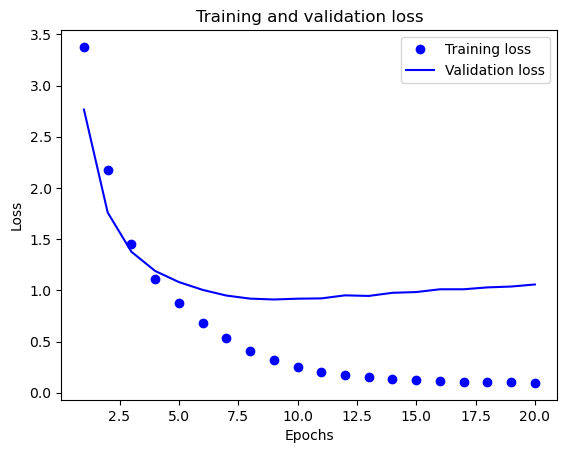

In [13]:
# 훈련과 검증 데이터에 대한 손실 비교 시각화
import matplotlib.pyplot as plt


epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 검증데이터가 5정도부터 손실이 증가하는걸 보면 과적합일 가능성있음

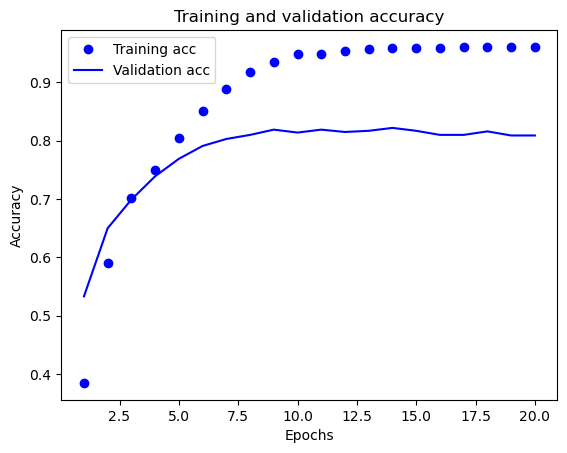

In [14]:
plt.clf()


# 정확도 비교

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
# 재훈련 : epochs = 4 
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(partial_X_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))



results = model.evaluate(X_test,y_test)

Epoch 1/10
16/16 [==============================] - 0s 16ms/step - loss: 3.4285 - accuracy: 0.4176 - val_loss: 2.7641 - val_accuracy: 0.5620
Epoch 2/10
16/16 [==============================] - 0s 11ms/step - loss: 2.1623 - accuracy: 0.6138 - val_loss: 1.7062 - val_accuracy: 0.6510
Epoch 3/10
16/16 [==============================] - 0s 13ms/step - loss: 1.3933 - accuracy: 0.7062 - val_loss: 1.3166 - val_accuracy: 0.7030
Epoch 4/10
16/16 [==============================] - 0s 11ms/step - loss: 1.0754 - accuracy: 0.7560 - val_loss: 1.1674 - val_accuracy: 0.7350
Epoch 5/10
16/16 [==============================] - 0s 11ms/step - loss: 0.8696 - accuracy: 0.8108 - val_loss: 1.0759 - val_accuracy: 0.7620
Epoch 6/10
16/16 [==============================] - 0s 12ms/step - loss: 0.6987 - accuracy: 0.8509 - val_loss: 1.0064 - val_accuracy: 0.7880
Epoch 7/10
16/16 [==============================] - 0s 11ms/step - loss: 0.5541 - accuracy: 0.8871 - val_loss: 0.9625 - val_accuracy: 0.7990
Epoch 8/10
16

In [16]:
from sklearn.metrics import accuracy_score, classification_report

predictions = model.predict(X_test)


predicted_classes = np.argmax(predictions, axis=1)


# 실제 라벨
true_classes = np.argmax(y_test, axis=1)

# 정확도
accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

# 세부 성능 지표
print(classification_report(true_classes, predicted_classes))

71/71 [==============================] - 0s 1ms/step
Accuracy: 0.7827248441674087
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.61      0.82      0.70       105
           2       0.79      0.55      0.65        20
           3       0.91      0.93      0.92       813
           4       0.81      0.89      0.85       474
           5       0.00      0.00      0.00         5
           6       0.76      0.93      0.84        14
           7       1.00      0.33      0.50         3
           8       0.71      0.66      0.68        38
           9       0.82      0.72      0.77        25
          10       0.79      0.87      0.83        30
          11       0.62      0.78      0.69        83
          12       0.40      0.15      0.22        13
          13       0.56      0.54      0.55        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9

/Users/choejong-gyu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choejong-gyu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/choejong-gyu/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# sparse1
# sparse_categorical_cross


x_val = X_train[:1000].astype(float)
partial_X_train = X_train[1000:].astype(float)

y_val = train_labels[:1000].astype(float)
partial_y_train = train_labels[1000:].astype(float)

In [18]:
# sparse2

model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))


model.compile(optimizer='rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_X_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))


results = model.evaluate(X_test,test_labels)

Epoch 1/9
16/16 [==============================] - 1s 19ms/step - loss: 2.6102 - accuracy: 0.5224 - val_loss: 1.7306 - val_accuracy: 0.6510
Epoch 2/9
16/16 [==============================] - 0s 15ms/step - loss: 1.4165 - accuracy: 0.7012 - val_loss: 1.3233 - val_accuracy: 0.7060
Epoch 3/9
16/16 [==============================] - 0s 12ms/step - loss: 1.0649 - accuracy: 0.7672 - val_loss: 1.1683 - val_accuracy: 0.7410
Epoch 4/9
16/16 [==============================] - 0s 13ms/step - loss: 0.8464 - accuracy: 0.8160 - val_loss: 1.0629 - val_accuracy: 0.7700
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 0.6793 - accuracy: 0.8533 - val_loss: 1.0032 - val_accuracy: 0.7930
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5427 - accuracy: 0.8885 - val_loss: 0.9879 - val_accuracy: 0.7910
Epoch 7/9
16/16 [==============================] - 0s 13ms/step - loss: 0.4410 - accuracy: 0.9087 - val_loss: 0.9413 - val_accuracy: 0.8070
Epoch 8/9
16/16 [===

In [19]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

In [20]:
# 예측

predictions = model.predict(X_test)

len(predictions)

71/71 [==============================] - 0s 2ms/step


2246

In [21]:
len(predictions[0])

46

In [22]:
predictions[0]

array([3.66988279e-05, 2.91042907e-05, 5.96245945e-06, 9.14700031e-01,
       7.76740909e-02, 6.18600916e-06, 3.30896510e-05, 1.29627415e-05,
       1.22130034e-03, 5.21567881e-06, 2.35087714e-06, 2.15284497e-04,
       3.89348170e-05, 7.15374772e-05, 3.24731081e-05, 2.75830207e-05,
       5.13851643e-04, 2.98134808e-04, 1.46249013e-05, 5.84998052e-04,
       2.21395399e-03, 1.51367014e-04, 6.89122498e-06, 4.03724080e-05,
       3.47791356e-05, 2.26678494e-05, 1.82831400e-06, 6.03925946e-06,
       5.03337942e-04, 1.88371021e-04, 1.17709722e-04, 2.22729257e-04,
       2.89985383e-05, 3.37160532e-06, 7.86594901e-05, 5.35070194e-06,
       3.10530595e-04, 3.27867128e-05, 2.56848261e-06, 3.82405648e-04,
       4.62729122e-06, 8.44354436e-05, 2.03488835e-05, 6.41595761e-06,
       1.41830469e-06, 3.43472539e-06], dtype=float32)

In [24]:
np.sum(predictions[0])

0.9999999

In [25]:
np.argmax(predictions[0])

3